# **Customer Sales Data EDA Analysis**


# **Import python libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings("ignore")

# **Dataset Loading**

In [5]:
df=pd.read_csv("/content/Customer_sales_dataset.csv")

In [6]:
# show fisrt 5 rows
df.head()

,order_id,order_date,region,country,customer_segment,product_category,product_name,quantity,unit_price,sales,discount,profit
0,ORD204623,2021-01-01,North,UK,Consumer,Electronics,Desk,5,"1,171.17","5,855.85",0.01,963.95
1,ORD213244,2021-01-01,North,Australia,Home Office,Office Supplies,Monitor,6,214.62,"1,287.72",0.28,-129.88
2,ORD200353,2021-01-01,East,UK,Corporate,Electronics,Printer,8,664.31,"5,314.48",0.19,-551.49
3,ORD204552,2021-01-01,North,Australia,Consumer,Electronics,Monitor,2,595.92,"1,191.84",0.22,-136.84
4,ORD210506,2021-01-01,Central,India,Consumer,Furniture,Mobile,9,58.07,522.63,0.26,-49.77


In [7]:
# show last five rows
df.tail()

,order_id,order_date,region,country,customer_segment,product_category,product_name,quantity,unit_price,sales,discount,profit
14995,ORD214919,2024-12-30,South,UK,Consumer,Electronics,Chair,2,"1,183.61","2,367.22",0.29,-214.92
14996,ORD203260,2024-12-30,North,Australia,Home Office,Furniture,Laptop,9,"1,701.71","15,315.39",0.28,"-3,497.18"
14997,ORD202671,2024-12-30,East,Australia,Home Office,Office Supplies,Mouse,2,847.27,"1,694.54",0.04,381.47
14998,ORD202805,2024-12-30,North,India,Corporate,Electronics,Monitor,3,"1,682.76","5,048.28",0.16,665.99
14999,ORD200137,2024-12-30,West,Australia,Home Office,Office Supplies,Laptop,8,441.52,"3,532.16",0.03,454.69


In [10]:
#shape of dataset
df.shape

(15000, 12)

In [11]:
#Check all the cloumns in dataset
df.columns

Index(['order_id', 'order_date', 'region', 'country', 'customer_segment',
       'product_category', 'product_name', 'quantity', 'unit_price', 'sales',
       'discount', 'profit'],
      dtype='object')

In [12]:
#check datatype of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          15000 non-null  object 
 1   order_date        15000 non-null  object 
 2   region            15000 non-null  object 
 3   country           15000 non-null  object 
 4   customer_segment  15000 non-null  object 
 5   product_category  15000 non-null  object 
 6   product_name      15000 non-null  object 
 7   quantity          15000 non-null  int64  
 8   unit_price        15000 non-null  float64
 9   sales             15000 non-null  float64
 10  discount          15000 non-null  float64
 11  profit            15000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


# **Data Cleaning and Preprocessing**

In [13]:
# identify Missing values
df.isnull().sum()

,0
order_id,0
order_date,0
region,0
country,0
customer_segment,0
product_category,0
product_name,0
quantity,0
unit_price,0
sales,0


**Insights** -- There is no anykind of missing value and no need to handle them.

In [15]:
df.duplicated().sum()

np.int64(0)

**Insights** -- I have been observed that there is no duplicate value and it is good for analysis


In [16]:
df.dtypes

,0
order_id,object
order_date,object
region,object
country,object
customer_segment,object
product_category,object
product_name,object
quantity,int64
unit_price,float64
sales,float64


**Insights** -- As per my analysis all the data types are correct and no need to change them

In [17]:
#Standardtize text
df.columns = df.columns.str.title().str.replace(' ', '_')

In [18]:
df.head()

,Order_Id,Order_Date,Region,Country,Customer_Segment,Product_Category,Product_Name,Quantity,Unit_Price,Sales,Discount,Profit
0,ORD204623,2021-01-01,North,UK,Consumer,Electronics,Desk,5,"1,171.17","5,855.85",0.01,963.95
1,ORD213244,2021-01-01,North,Australia,Home Office,Office Supplies,Monitor,6,214.62,"1,287.72",0.28,-129.88
2,ORD200353,2021-01-01,East,UK,Corporate,Electronics,Printer,8,664.31,"5,314.48",0.19,-551.49
3,ORD204552,2021-01-01,North,Australia,Consumer,Electronics,Monitor,2,595.92,"1,191.84",0.22,-136.84
4,ORD210506,2021-01-01,Central,India,Consumer,Furniture,Mobile,9,58.07,522.63,0.26,-49.77


# **Exploratory Data Analysis**

In [19]:
# summary Statistics
df.describe()

,Quantity,Unit_Price,Sales,Discount,Profit
count,"15,000.00","15,000.00","15,000.00","15,000.00","15,000.00"
mean,5.47,"1,019.65","5,582.70",0.15,133.73
std,2.87,564.00,"4,547.63",0.09,810.15
min,1.00,50.16,50.16,0.00,"-3,889.18"
25%,3.00,524.12,"1,805.56",0.08,-167.92
50%,5.00,"1,015.83","4,288.35",0.15,52.10
75%,8.00,"1,506.81","8,393.08",0.22,401.33
max,10.00,"1,999.81","19,969.80",0.30,"5,186.82"


**Insights** -- Sales and profit values show high variability, indicating a mix of low and high-value orders.


In [22]:
#categorial columns value count
df['Region'].value_counts()

,count
Region,
Central,3086
West,3067
North,2956
East,2952
South,2939


In [23]:
df['Product_Category'].value_counts()

,count
Product_Category,
Furniture,5038
Electronics,4994
Office Supplies,4968


**Insights** --

central Region is th most frequently sold.

Electronics is the most frequently sold category.


In [24]:
#groupby analysis
df.groupby("Product_Category")['Sales'].sum().sort_values(ascending=False)

,Sales
Product_Category,
Furniture,"28,790,718.64"
Electronics,"27,620,653.96"
Office Supplies,"27,329,149.28"


In [25]:
#Avg profit
df.groupby("Customer_Segment")["Profit"].mean()

,Profit
Customer_Segment,
Consumer,123.84
Corporate,131.56
Home Office,146.01


**Insights** --

Furniture generates the highest revenue, driven by higher unit prices.

Home office customers generate the highest average profit per order.

In [28]:
#top 10 product by sale
df.groupby("Product_Name")["Sales"].sum().sort_values(ascending=False).head(10)

,Sales
Product_Name,
Desk,"10,881,070.68"
Printer,"10,701,074.38"
Monitor,"10,669,238.72"
Chair,"10,390,661.19"
Mobile,"10,375,226.67"
Mouse,"10,294,780.40"
Keyboard,"10,221,058.38"
Laptop,"10,207,411.46"


In [29]:
df.sort_values('Profit').head(10)

,Order_Id,Order_Date,Region,Country,Customer_Segment,Product_Category,Product_Name,Quantity,Unit_Price,Sales,Discount,Profit
12719,ORD201357,2024-05-15,North,Australia,Consumer,Furniture,Laptop,9,"1,761.01","15,849.09",0.30,"-3,889.18"
783,ORD210279,2021-03-17,East,USA,Consumer,Electronics,Monitor,10,"1,969.37","19,693.70",0.27,"-3,866.71"
12593,ORD206533,2024-05-01,West,India,Corporate,Furniture,Mobile,10,"1,681.19","16,811.90",0.29,"-3,794.34"
5343,ORD202131,2022-06-01,Central,USA,Home Office,Furniture,Mouse,10,"1,701.44","17,014.40",0.28,"-3,729.44"
8189,ORD209361,2023-03-06,North,Germany,Home Office,Electronics,Monitor,10,"1,556.05","15,560.50",0.30,"-3,648.07"
1683,ORD201724,2021-06-12,South,Germany,Home Office,Furniture,Monitor,9,"1,881.47","16,933.23",0.30,"-3,605.30"
14996,ORD203260,2024-12-30,North,Australia,Home Office,Furniture,Laptop,9,"1,701.71","15,315.39",0.28,"-3,497.18"
14226,ORD201285,2024-10-14,North,USA,Corporate,Electronics,Monitor,8,"1,889.05","15,112.40",0.30,"-3,484.06"
3276,ORD213831,2021-11-12,South,Australia,Consumer,Furniture,Monitor,8,"1,833.20","14,665.60",0.29,"-3,466.08"
1700,ORD206985,2021-06-13,South,India,Corporate,Electronics,Mobile,8,"1,834.34","14,674.72",0.29,"-3,430.32"


**Insighta** --

High-priced items like Desks and Printers dominate sales revenue.

Some orders show negative profit, mainly due to high discounts.

In [30]:
#correlation Between Numerical colums
df[["Quantity",'Unit_Price','Sales','Discount','Profit']].corr()

,Quantity,Unit_Price,Sales,Discount,Profit
Quantity,1.00,0.00,0.65,0.01,0.08
Unit_Price,0.00,1.00,0.68,-0.01,0.10
Sales,0.65,0.68,1.00,-0.00,0.14
Discount,0.01,-0.01,-0.00,1.00,-0.59
Profit,0.08,0.10,0.14,-0.59,1.00


**Insights** --

Sales and profit are strongly positively correlated.

Discount has a negative correlation with profit, confirming margin erosion.

# **Data Visuallization**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

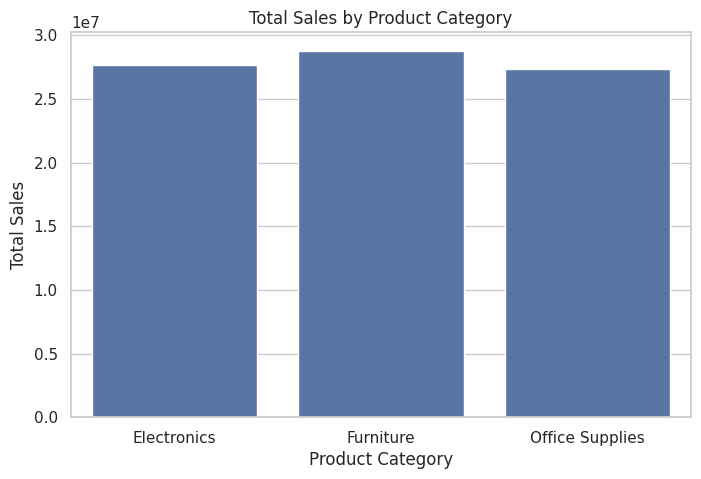

In [33]:
# Categorical Sales comparison
plt.figure(figsize=(8,5))
sns.barplot(
    x=df.groupby("Product_Category")["Sales"].sum().index,
    y=df.groupby("Product_Category")["Sales"].sum().values
)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

**Insights** -- Furniture is the top revenue-generating category

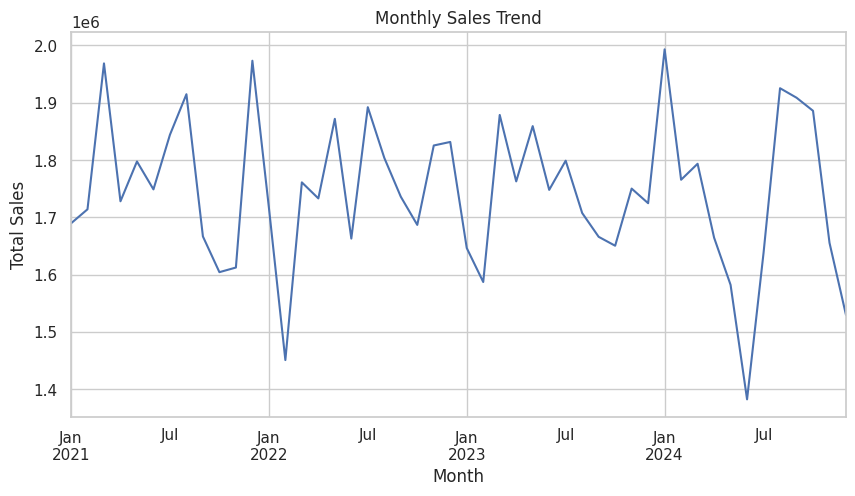

In [34]:
#Trend analysis over time
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
monthly_sales = df.groupby(df["Order_Date"].dt.to_period("M"))["Sales"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


**Insights** -- Certain months experience spikes, indicating seasonal demand.

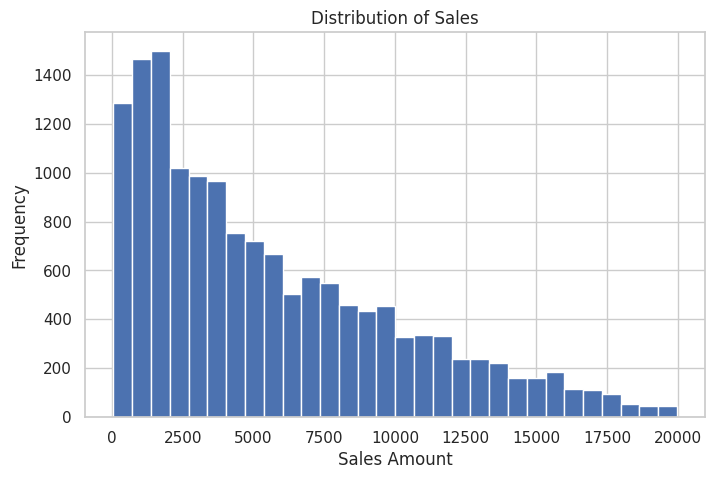

In [35]:
# sales Distribution
plt.figure(figsize=(8,5))
plt.hist(df["Sales"], bins=30)
plt.title("Distribution of Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


**Insights** -- Few high-value transactions significantly impact total revenue.

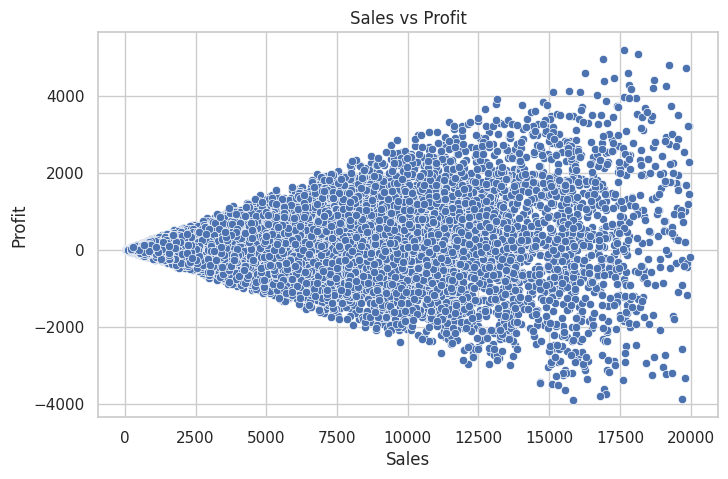

In [36]:
#Show sales vs profit
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sales", y="Profit", data=df)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


 **insights** -- Higher sales generally lead to higher profit.

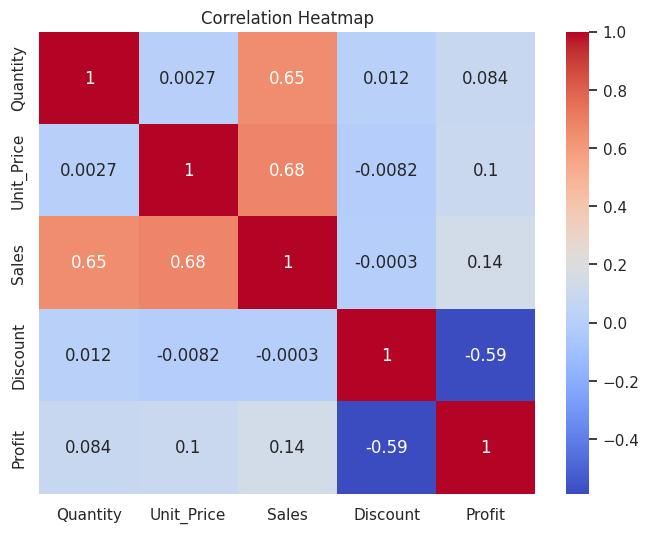

In [39]:
#shows correlation between numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(
    df[["Quantity", "Unit_Price", "Sales", "Discount", "Profit"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


Strong positive correlation between sales and profit.

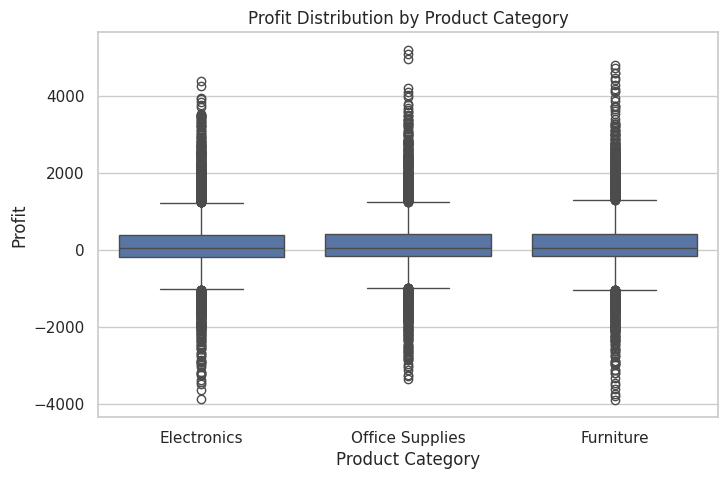

In [38]:
#indentify the outliers
plt.figure(figsize=(8,5))
sns.boxplot(x="Product_Category", y="Profit", data=df)
plt.title("Profit Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.show()


**Insights** -- Electronics shows higher profit spread and outliers.

**1.Revenue Concentration in Few Products**

What the data shows:
 The analysis reveals that a small number of high-priced products—mainly in the Furniture category—contribute a disproportionately large share of total sales revenue. Most orders are low-value, but a few high-value transactions significantly impact overall sales.

Why it matters:
This indicates revenue dependency on key products. While profitable, it increases business risk if demand for these products declines. Diversifying revenue sources can improve long-term stability.

**2.Relationship Between Sales and Profit**

What the data shows:
Sales and profit have a strong positive relationship, meaning higher sales generally lead to higher profit. However, this relationship is inconsistent, as some high-sales orders generate low or even negative profit.

Why it matters:
This shows that revenue growth alone does not guarantee profitability. Profit-focused strategies are needed alongside sales expansion to ensure sustainable growth.

**3.Impact of Discounts on Profitability**

What the data shows:
Discount levels vary across orders, and higher discounts are clearly associated with lower profit margins. Some heavily discounted orders result in losses despite high sales values.

Why it matters:
Discounting must be carefully controlled. Unplanned or excessive discounts directly reduce profit, making pricing strategy a critical business decision.

**4.Product Category Performance**

What the data shows:
Electronics dominates in both sales and profit due to higher unit prices. Office Supplies shows high order volume but low revenue and profit per order. Furniture falls between the two, with moderate performance.

Why it matters:
Understanding category-level performance helps allocate resources efficiently. High-margin categories should receive priority, while low-margin categories need cost optimization or pricing review.

**5.Customer Segment Behavior**

What the data shows:
Corporate customers generate higher average profit per order compared to Consumer and Home Office segments. Consumers place more orders but contribute lower profit per transaction.

Why it matters:
Targeting high-value customer segments improves overall profitability. Marketing and sales efforts should be aligned with segments that offer better returns.

**6.Regional and Country-Level Distribution**

What the data shows:
Sales are evenly distributed across regions, with India and the USA emerging as top revenue-generating countries. No single region dominates overall sales.

Why it matters:
This geographic diversification reduces business risk. It also highlights markets with growth potential where focused expansion can increase revenue.

**7.Sales Trends Over Time**

What the data shows:
Monthly sales trends show steady growth with noticeable seasonal fluctuations. Certain periods record spikes in sales, likely due to promotions or seasonal demand.

Why it matters:
Identifying trends helps in better demand forecasting, inventory planning, and timing promotional campaigns to maximize impact.

**8.Variability, Outliers, and Business Risk**

What the data shows:
Sales and profit distributions are right-skewed, with several outliers showing extremely high or low profit. Electronics category shows the highest variability.

Why it matters:
Outliers can distort overall performance metrics. Monitoring these cases helps identify high-risk transactions and exceptional opportunities, leading to better decision-making.